In [1]:
import pandas as pd
import numpy as np

In [2]:
%%time
train_df = pd.read_csv('tap_fun_train.csv')
test_df = pd.read_csv('tap_fun_test.csv')

Wall time: 25.5 s


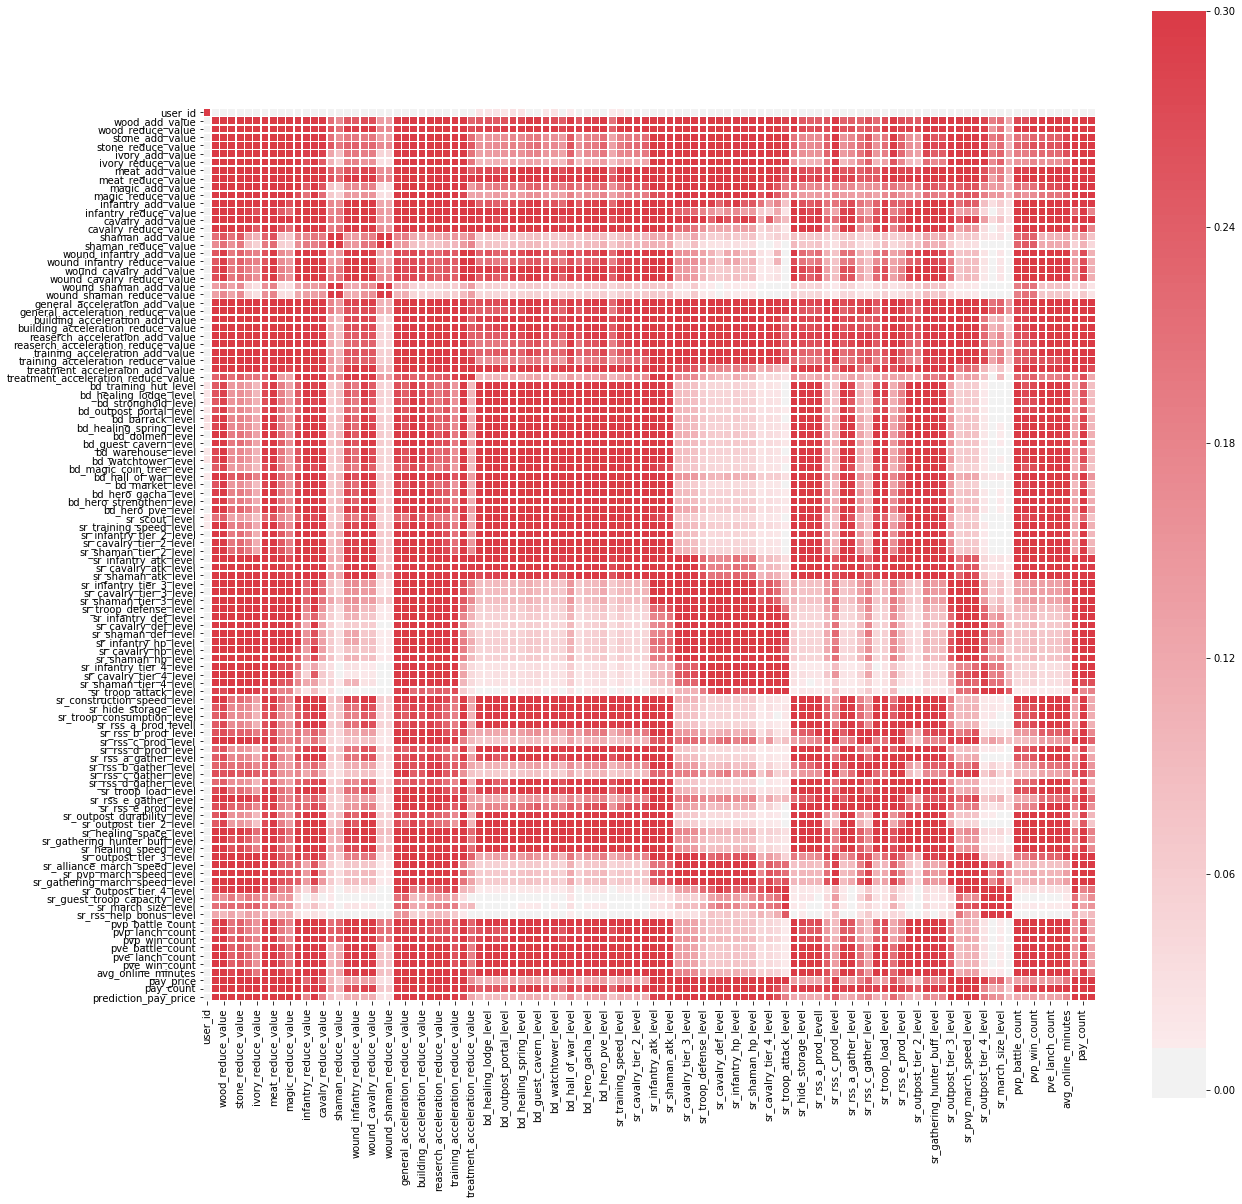

Wall time: 54.8 s


In [3]:
%%time
# corr plot## corr 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
corr = train_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

In [3]:
def cleaning(data):
    data.drop(['register_time','user_id'],axis=1,inplace=True)
    data['wood_remain_value'] = data['wood_add_value'] - data['wood_reduce_value']
    data['stone_remain_value'] = data['stone_add_value'] - data['stone_reduce_value']
    data['ivory_remain_value'] = data['ivory_add_value'] - data['ivory_reduce_value']
    data['meat_remain_value'] = data['meat_add_value'] - data['meat_reduce_value']
    data['magic_remain_value'] = data['magic_add_value'] - data['magic_reduce_value']
    data['infantry-remain_value'] = data['infantry_add_value'] - data['infantry_reduce_value']
    data['cavalry-remain_value'] = data['cavalry_add_value'] - data['cavalry_reduce_value']
    data['shaman-remain_value'] = data['shaman_add_value'] - data['shaman_reduce_value']
    data['wound_infantry-remain_value'] = data['wound_infantry_add_value'] - data['wound_infantry_reduce_value']
    data['wound_cavalry-remain_value'] = data['wound_cavalry_add_value'] - data['wound_cavalry_reduce_value']
    data['wound_shaman-remain_value'] = data['wound_shaman_add_value'] - data['wound_shaman_reduce_value']
    data['general_acceleration-remain_value'] = data['general_acceleration_add_value'] - data['general_acceleration_reduce_value']
    data['building_acceleration-remain_value'] = data['building_acceleration_add_value'] - data['building_acceleration_reduce_value']
    data['research_acceleration-remain_value'] = data['reaserch_acceleration_add_value'] - data['reaserch_acceleration_reduce_value']
    data['training_acceleration-remain_value'] = data['training_acceleration_add_value'] - data['training_acceleration_reduce_value']
    data['treatment_acceleration-remain_value'] = data['treatment_acceleraion_add_value'] - data['treatment_acceleration_reduce_value']
    data['pvp_passive'] = data['pvp_battle_count'] - data['pvp_lanch_count']
    data['pvp_lose'] = data['pvp_battle_count'] - data['pvp_win_count']
    data['pve_passive'] = data['pve_battle_count'] - data['pve_lanch_count']
    data['pve_lose'] = data['pve_battle_count'] - data['pve_win_count']
    
#     for i in range(len(data)):
#         if data[i].pay_count != 0:
#             data.iloc[i]['avg_payment'] = data.iloc[i]['pay_price'] / data.iloc[i]['pay_count']
    
    return data

In [4]:
y = train_df.prediction_pay_price
testid = test_df.user_id
train_df.drop(['prediction_pay_price'],axis=1,inplace = True)

In [5]:
%%time
train_df = cleaning(train_df)
test_df = cleaning(test_df)

Wall time: 1.57 s


In [6]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import scale
# scaler = StandardScaler()
# x_train_scale = scaler.fit_transform(train_df)
# test_scale = scaler.transform(test_df)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.1)

### Linear Regression

In [8]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(x_train, y_train)
preds = reg.predict(x_test)
# y_pred = reg.predict(x_test)
print('RMSE: {}'.format(mean_squared_error(preds,y_test,multioutput = 'uniform_average')**0.5))

RMSE: 39.786080072972766
Wall time: 27.8 s


### Ridge Regression

In [9]:
%%time
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
reg2 = Ridge(alpha=1,solver = 'auto')
reg2.fit(x_train, y_train)
preds2 = reg2.predict(x_test)
# y_pred = reg2.predict(test_scale)
# print(reg2.score(x_train, y_train))
print('RMSE: {}'.format(mean_squared_error(preds2,y_test,multioutput = 'uniform_average')**0.5))

RMSE: 39.67349494108412
Wall time: 39.6 s


### LGBM Regression

In [10]:
%%time
from lightgbm import LGBMRegressor

reg3 = LGBMRegressor(boosting_type='gbdt',
                     num_leaves=31, max_depth=-1, 
                     learning_rate=0.1, n_estimators=n, 
                     subsample_for_bin=200000, objective=None,
                     class_weight=None, min_split_gain=0.0, 
                     min_child_weight=0.001,
                     min_child_samples=20, subsample=1.0, subsample_freq=1,
                     colsample_bytree=1.0,
                     reg_alpha=0.0, reg_lambda=0.0, random_state=None,
                     n_jobs=-1, silent=True)
reg3.fit(x_train, y_train)
preds3 = reg3.predict(x_test)
# y_pred2 = reg3.predict(x_test)
print('RMSE: {}'.format(mean_squared_error(preds3,y_test,multioutput = 'uniform_average')**0.5))

RMSE: 47.40397345840647
Wall time: 2min 26s


In [11]:
output_preds = pd.DataFrame()

In [12]:
output_preds['linear'] = reg.predict(test_df)
output_preds['Ridge'] = reg2.predict(test_df)
output_preds['Lgbm'] = reg3.predict(test_df)

In [15]:
y_pred = output_preds.Ridge

In [14]:
output_preds.describe()

,linear,Ridge,Lgbm
count,828934.000000,828934.000000,828934.000000
mean,2.496951,2.488366,2.420275
std,88.355121,88.003515,76.787754
min,-661.442235,-643.111077,-438.160799
25%,-0.406875,-0.405791,0.019888
50%,-0.057046,-0.046082,0.019888
75%,0.567369,0.551277,0.019888
max,47831.155635,47179.416021,14765.294483


### Output Processing

In [20]:
## output processing
# y_pred[y_pred<0.5] = 0
# abb[(abb[0]>0) & (abb[0]<1)] = 0.99
sub = pd.DataFrame({'user_id':testid,'prediction_pay_price': y_pred},columns=['user_id','prediction_pay_price'])
sub.to_csv('output_Ridge.csv',index=None)

In [17]:
len(preds)

228801